In [1]:
from utils import *
from objects import *
from sweeper_helperfunctions import *

In [2]:
design = metal.designs.design_planar.DesignPlanar()
gui = metal.MetalGUI(design)
design.overwrite_enabled = True

In [3]:
cpw_sweep_opts = Dict(
                meander = Dict(asymmetry = ['-50um', '-100um', '-150um', '-200um', '-250um'],
                               spacing = "100um"
                                # asymmetry = f'{-i*25}um'
                                ),
                fillet = '49.9um',
                total_length = "4400um",
                trace_width = "11.7um",
                trace_gap = '5.1um')

In [4]:
claw_sweep_opts = dict(
    connection_pads=dict(
        readout = dict(connector_location = '90', 
                 connector_type = '0', 
                 claw_length = "250um", #[f"{70+i*10}um" for i in range(39)],
                 ground_spacing = '4.1um', 
                 claw_gap = '5.1um', 
                 claw_width = '15um',
                 claw_cpw_width = "11.7um",
                 claw_cpw_length = '0um'
                 ),
    ),
    cross_width = '30um', # does not matter
    cross_length = '240um',  # does not matter
    cross_gap = '30um',  # does not matter
)

In [5]:
cplr_sweep_opts = Dict(prime_width = "11.7um",
            prime_gap = '5.1um',
            second_width = "11.7um",
            second_gap = '5.1um',
            coupling_space = '7.9um',
            coupling_length = '500um',
            open_termination = False,
            down_length = '50um')

In [6]:
sweep_opts = Dict(claw_opts = claw_sweep_opts, cpw_opts = cpw_sweep_opts, cplr_opts = cplr_sweep_opts)

In [7]:
comps_available = {
    # "Sabrina":0,
    "Glinda":0,
    "Saruman":1,
    # "VM84(glinda)":2, #?
    # "VM85":3, #?
}

In [8]:
comp_id = "GlindaTEST"  # Replace with actual computer name

In [9]:
N = len(comps_available)  # Number of computers
sweep_opts_chunks = chunk_sweep_options(sweep_opts, N)

In [10]:
# sweep_opts_deployed = sweep_opts_chunks[comps_available[comp_id]]  # Get the i-th chunk
sweep_opts_deployed = sweep_opts
sweep_opts_deployed

{'claw_opts': {'connection_pads': {'readout': {'connector_location': '90',
    'connector_type': '0',
    'claw_length': '250um',
    'ground_spacing': '4.1um',
    'claw_gap': '5.1um',
    'claw_width': '15um',
    'claw_cpw_width': '11.7um',
    'claw_cpw_length': '0um'}},
  'cross_width': '30um',
  'cross_length': '240um',
  'cross_gap': '30um'},
 'cpw_opts': {'meander': {'asymmetry': ['-50um',
    '-100um',
    '-150um',
    '-200um',
    '-250um'],
   'spacing': '100um'},
  'fillet': '49.9um',
  'total_length': '4400um',
  'trace_width': '11.7um',
  'trace_gap': '5.1um'},
 'cplr_opts': {'prime_width': '11.7um',
  'prime_gap': '5.1um',
  'second_width': '11.7um',
  'second_gap': '5.1um',
  'coupling_space': '7.9um',
  'coupling_length': '500um',
  'open_termination': False,
  'down_length': '50um'}}

In [11]:
extract_QSweep_parameters(sweep_opts)

[{'claw_opts': {'connection_pads': {'readout': {'connector_location': '90',
     'connector_type': '0',
     'claw_length': '250um',
     'ground_spacing': '4.1um',
     'claw_gap': '5.1um',
     'claw_width': '15um',
     'claw_cpw_width': '11.7um',
     'claw_cpw_length': '0um'}},
   'cross_width': '30um',
   'cross_length': '240um',
   'cross_gap': '30um'},
  'cpw_opts': {'meander': {'asymmetry': '-50um', 'spacing': '100um'},
   'fillet': '49.9um',
   'total_length': '4400um',
   'trace_width': '11.7um',
   'trace_gap': '5.1um'},
  'cplr_opts': {'prime_width': '11.7um',
   'prime_gap': '5.1um',
   'second_width': '11.7um',
   'second_gap': '5.1um',
   'coupling_space': '7.9um',
   'coupling_length': '500um',
   'open_termination': False,
   'down_length': '50um'}},
 {'claw_opts': {'connection_pads': {'readout': {'connector_location': '90',
     'connector_type': '0',
     'claw_length': '250um',
     'ground_spacing': '4.1um',
     'claw_gap': '5.1um',
     'claw_width': '15um',
   

INFO 11:09AM [connect_project]: Connecting to Ansys Desktop API...
INFO 11:09AM [load_ansys_project]: 	Opened Ansys App
INFO 11:09AM [load_ansys_project]: 	Opened Ansys Desktop v2021.1.0
INFO 11:09AM [load_ansys_project]: 	Opened Ansys Project
	Folder:    D:/Users/lfl/Documents/Ansoft/
	Project:   fig4_39x_150khz_Glinda


{'claw_opts': {'connection_pads': {'readout': {'connector_location': '90', 'connector_type': '0', 'claw_length': '250um', 'ground_spacing': '4.1um', 'claw_gap': '5.1um', 'claw_width': '15um', 'claw_cpw_width': '11.7um', 'claw_cpw_length': '0um'}}, 'cross_width': '30um', 'cross_length': '240um', 'cross_gap': '30um'}, 'cpw_opts': {'meander': {'asymmetry': '-50um', 'spacing': '100um'}, 'fillet': '49.9um', 'total_length': '4400um', 'trace_width': '11.7um', 'trace_gap': '5.1um'}, 'cplr_opts': {'prime_width': '11.7um', 'prime_gap': '5.1um', 'second_width': '11.7um', 'second_gap': '5.1um', 'coupling_space': '7.9um', 'coupling_length': '500um', 'open_termination': False, 'down_length': '50um'}}
Starting the Simulation


INFO 11:09AM [connect_design]: 	Opened active design
	Design:    CLT__claw250um_GlindaTEST_08122023_10.58.49_hfss [Solution type: Eigenmode]
INFO 11:09AM [get_setup]: 	Opened setup `Setup`  (<class 'pyEPR.ansys.HfssEMSetup'>)
INFO 11:09AM [connect]: 	Connected to project "fig4_39x_150khz_Glinda" and design "CLT__claw250um_GlindaTEST_08122023_10.58.49_hfss" 😀 

INFO 11:09AM [connect_design]: 	Opened active design
	Design:    CLT__claw250um_GlindaTEST_08122023_11.09.21 [Solution type: Eigenmode]
WARNING 11:09AM [connect_setup]: 	No design setup detected.
WARNING 11:09AM [connect_setup]: 	Creating eigenmode default setup.
INFO 11:09AM [get_setup]: 	Opened setup `Setup`  (<class 'pyEPR.ansys.HfssEMSetup'>)
INFO 11:10AM [connect_design]: 	Opened active design
	Design:    CLT__claw250um_GlindaTEST_08122023_11.09.21_hfss [Solution type: Eigenmode]
WARNING 11:10AM [connect_setup]: 	No design setup detected.
WARNING 11:10AM [connect_setup]: 	Creating eigenmode default setup.
INFO 11:10AM [get_s

Sim rendered into HFSS!
pyaedt INFO: using existing logger.


INFO:Global:using existing logger.


pyaedt INFO: Launching PyAEDT outside AEDT with CPython and PythonNET.


INFO:Global:Launching PyAEDT outside AEDT with CPython and PythonNET.


pyaedt INFO: AEDT installation Path C:\Program Files\AnsysEM\AnsysEM21.1\Win64.


INFO:Global:AEDT installation Path C:\Program Files\AnsysEM\AnsysEM21.1\Win64.


pyaedt INFO: Launching AEDT with module PythonNET.


INFO:Global:Launching AEDT with module PythonNET.


pyaedt WARNING: PyAEDT is not supported in AEDT versions earlier than 2021 R2. Trying to launch PyAEDT with PyWin32.


pyaedt INFO: pyaedt v0.6.46


INFO:Global:pyaedt v0.6.46


pyaedt INFO: Python version 3.11.3 | packaged by conda-forge | (main, Apr  6 2023, 08:50:54) [MSC v.1934 64 bit (AMD64)]


INFO:Global:Python version 3.11.3 | packaged by conda-forge | (main, Apr  6 2023, 08:50:54) [MSC v.1934 64 bit (AMD64)]


pyaedt INFO: Project fig4_39x_150khz_Glinda set to active.


INFO:Global:Project fig4_39x_150khz_Glinda set to active.


pyaedt INFO: Aedt Objects initialized


INFO:Global:Aedt Objects initialized


pyaedt INFO: Variable Manager initialized


INFO:Global:Variable Manager initialized


pyaedt INFO: Design Loaded


INFO:Global:Design Loaded


pyaedt INFO: Successfully loaded project materials !


INFO:Global:Successfully loaded project materials !


pyaedt INFO: Materials Loaded


INFO:Global:Materials Loaded


pyaedt INFO: aedt file load time 5.431365966796875


INFO:Global:aedt file load time 5.431365966796875


pyaedt INFO: Project files removed from handlers.


INFO:Global:Project files removed from handlers.
INFO 11:14AM [get_setup]: 	Opened setup `Setup`  (<class 'pyEPR.ansys.HfssEMSetup'>)
INFO 11:14AM [analyze]: Analyzing setup Setup
12:06PM 29s INFO [get_f_convergence]: Saved convergences to d:\andre\cavity_sweeps\hfss_eig_f_convergence.csv


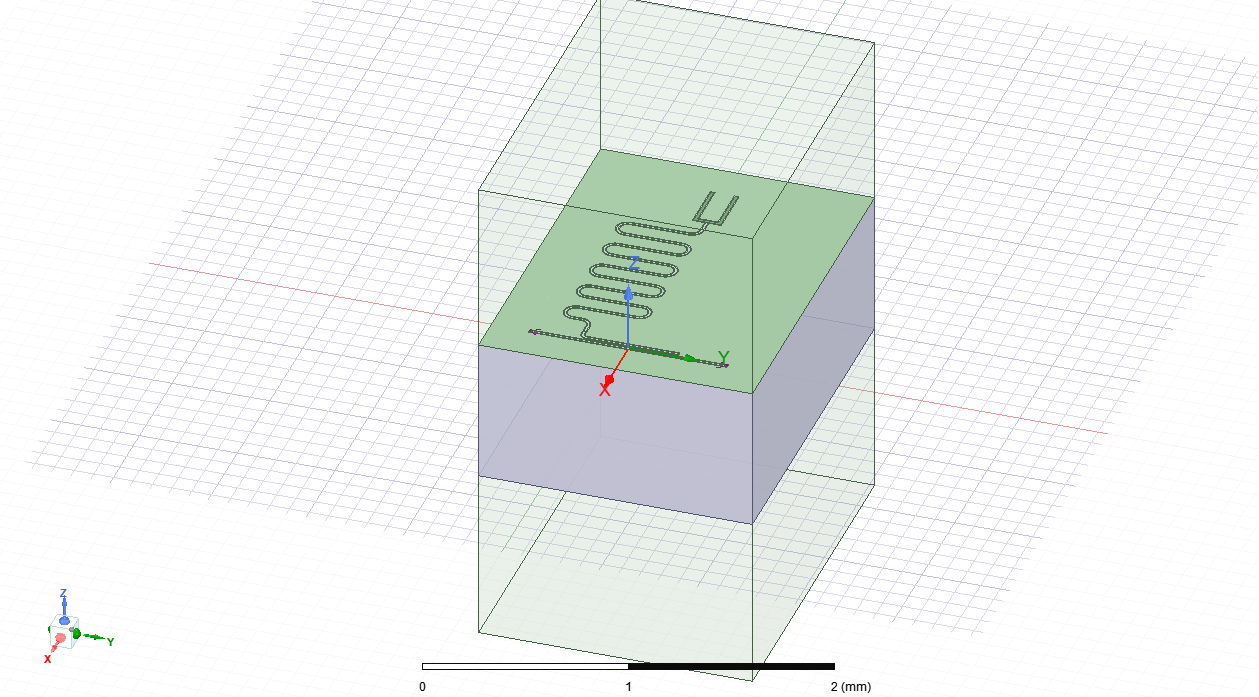

INFO 12:06PM [get_setup]: 	Opened setup `Setup`  (<class 'pyEPR.ansys.HfssEMSetup'>)


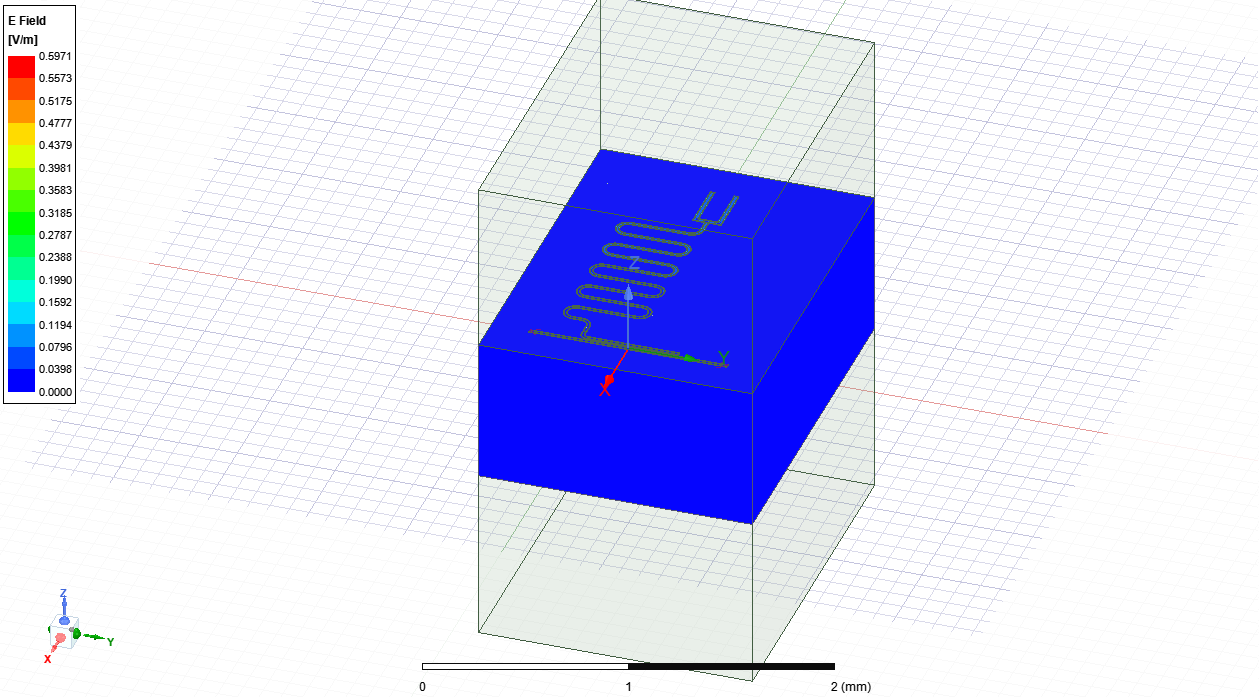

Design "CLT__claw250um_GlindaTEST_08122023_11.09.21_hfss" info:
	# eigenmodes    1
	# variations    1
Design "CLT__claw250um_GlindaTEST_08122023_11.09.21_hfss" info:
	# eigenmodes    1
	# variations    1


INFO 12:06PM [connect_project]: Connecting to Ansys Desktop API...


freq = 5.405 GHz
Q = 15231.2
kappa = 0.355 MHz
{'claw_opts': {'connection_pads': {'readout': {'connector_location': '90', 'connector_type': '0', 'claw_length': '250um', 'ground_spacing': '4.1um', 'claw_gap': '5.1um', 'claw_width': '15um', 'claw_cpw_width': '11.7um', 'claw_cpw_length': '0um'}}, 'cross_width': '30um', 'cross_length': '240um', 'cross_gap': '30um'}, 'cpw_opts': {'meander': {'asymmetry': '-100um', 'spacing': '100um'}, 'fillet': '49.9um', 'total_length': '4400um', 'trace_width': '11.7um', 'trace_gap': '5.1um'}, 'cplr_opts': {'prime_width': '11.7um', 'prime_gap': '5.1um', 'second_width': '11.7um', 'second_gap': '5.1um', 'coupling_space': '7.9um', 'coupling_length': '500um', 'open_termination': False, 'down_length': '50um'}}
Starting the Simulation


INFO 12:06PM [load_ansys_project]: 	Opened Ansys App
INFO 12:06PM [load_ansys_project]: 	Opened Ansys Desktop v2021.1.0
INFO 12:06PM [load_ansys_project]: 	Opened Ansys Project
	Folder:    D:/Users/lfl/Documents/Ansoft/
	Project:   fig4_39x_150khz_Glinda
INFO 12:07PM [connect_design]: 	Opened active design
	Design:    CLT__claw250um_GlindaTEST_08122023_11.09.21_hfss [Solution type: Eigenmode]
INFO 12:07PM [get_setup]: 	Opened setup `Setup`  (<class 'pyEPR.ansys.HfssEMSetup'>)
INFO 12:07PM [connect]: 	Connected to project "fig4_39x_150khz_Glinda" and design "CLT__claw250um_GlindaTEST_08122023_11.09.21_hfss" 😀 

INFO 12:08PM [connect_design]: 	Opened active design
	Design:    CLT__claw250um_GlindaTEST_08122023_12.06.56 [Solution type: Eigenmode]
WARNING 12:08PM [connect_setup]: 	No design setup detected.
WARNING 12:08PM [connect_setup]: 	Creating eigenmode default setup.
INFO 12:08PM [get_setup]: 	Opened setup `Setup`  (<class 'pyEPR.ansys.HfssEMSetup'>)
INFO 12:09PM [connect_design]: 	O

Sim rendered into HFSS!
pyaedt INFO: using existing logger.


INFO:Global:using existing logger.


pyaedt INFO: Launching PyAEDT outside AEDT with CPython and PythonNET.


INFO:Global:Launching PyAEDT outside AEDT with CPython and PythonNET.


pyaedt INFO: AEDT installation Path C:\Program Files\AnsysEM\AnsysEM21.1\Win64.


INFO:Global:AEDT installation Path C:\Program Files\AnsysEM\AnsysEM21.1\Win64.


pyaedt INFO: Launching AEDT with module PythonNET.


INFO:Global:Launching AEDT with module PythonNET.


pyaedt WARNING: PyAEDT is not supported in AEDT versions earlier than 2021 R2. Trying to launch PyAEDT with PyWin32.


pyaedt INFO: pyaedt v0.6.46


INFO:Global:pyaedt v0.6.46


pyaedt INFO: Python version 3.11.3 | packaged by conda-forge | (main, Apr  6 2023, 08:50:54) [MSC v.1934 64 bit (AMD64)]


INFO:Global:Python version 3.11.3 | packaged by conda-forge | (main, Apr  6 2023, 08:50:54) [MSC v.1934 64 bit (AMD64)]


pyaedt INFO: Project fig4_39x_150khz_Glinda set to active.


INFO:Global:Project fig4_39x_150khz_Glinda set to active.


pyaedt INFO: Aedt Objects initialized


INFO:Global:Aedt Objects initialized


pyaedt INFO: Variable Manager initialized


INFO:Global:Variable Manager initialized


pyaedt INFO: Design Loaded


INFO:Global:Design Loaded


pyaedt INFO: Successfully loaded project materials !


INFO:Global:Successfully loaded project materials !


pyaedt INFO: Materials Loaded


INFO:Global:Materials Loaded


pyaedt INFO: Project files removed from handlers.


INFO:Global:Project files removed from handlers.
INFO 12:13PM [get_setup]: 	Opened setup `Setup`  (<class 'pyEPR.ansys.HfssEMSetup'>)
INFO 12:13PM [analyze]: Analyzing setup Setup


In [12]:
CLT_epr_sweep(design, sweep_opts = sweep_opts_deployed, comp_name=comp_id)